In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("diabetes.csv", index_col=0)
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


In [3]:
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Text(0.5, 1.0, 'Outcome')

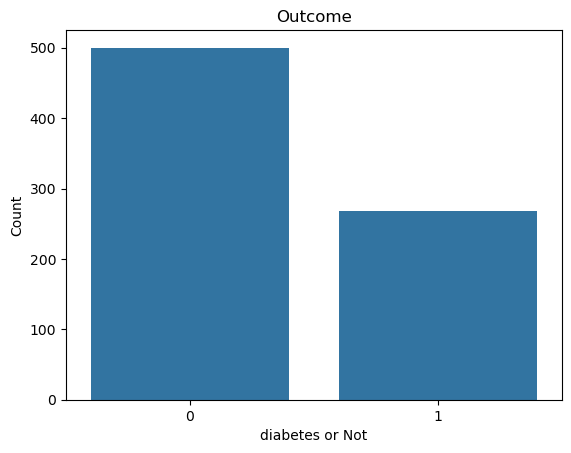

In [4]:
sns.countplot(data = df, x="Outcome")
plt.xlabel("diabetes or Not")
plt.ylabel("Count")
plt.title("Outcome")

In [5]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [6]:
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df = df.dropna()
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

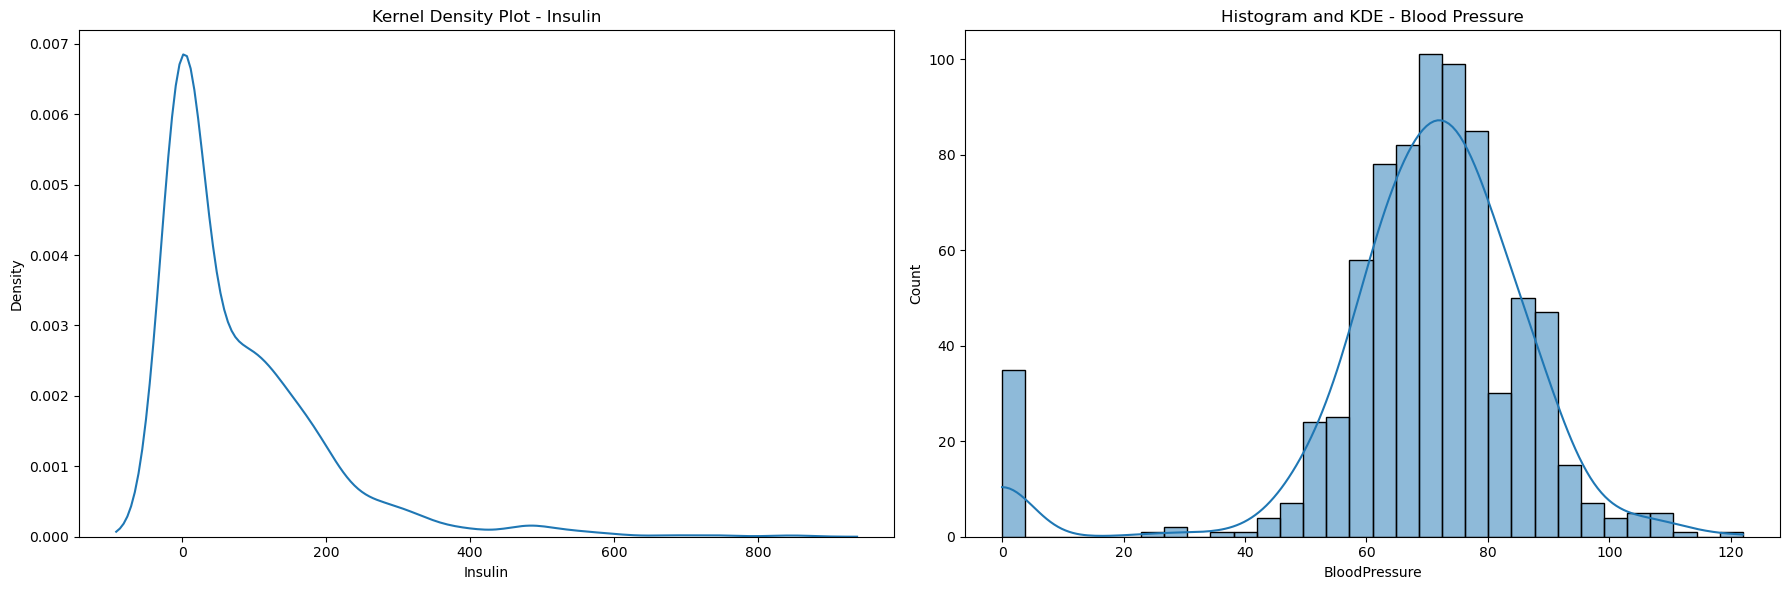

In [8]:
figure = plt.figure(figsize=(18,6))

ax1 = plt.subplot(1,2,1)
sns.kdeplot(df['Insulin'], ax=ax1)
ax1.set_title('Kernel Density Plot - Insulin')

ax2 = plt.subplot(1,2,2)
sns.histplot(df['BloodPressure'], kde=True, ax=ax2)
ax2.set_title('Histogram and KDE - Blood Pressure')

plt.tight_layout()
plt.show()

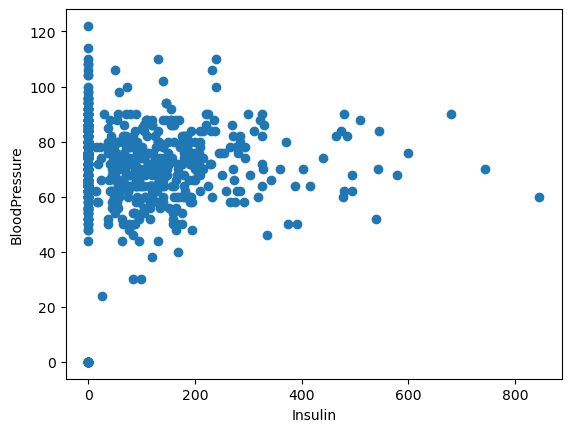

In [9]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df['Insulin'], df['BloodPressure'])
plt.xlabel('Insulin')
plt.ylabel('BloodPressure')

plt.show()

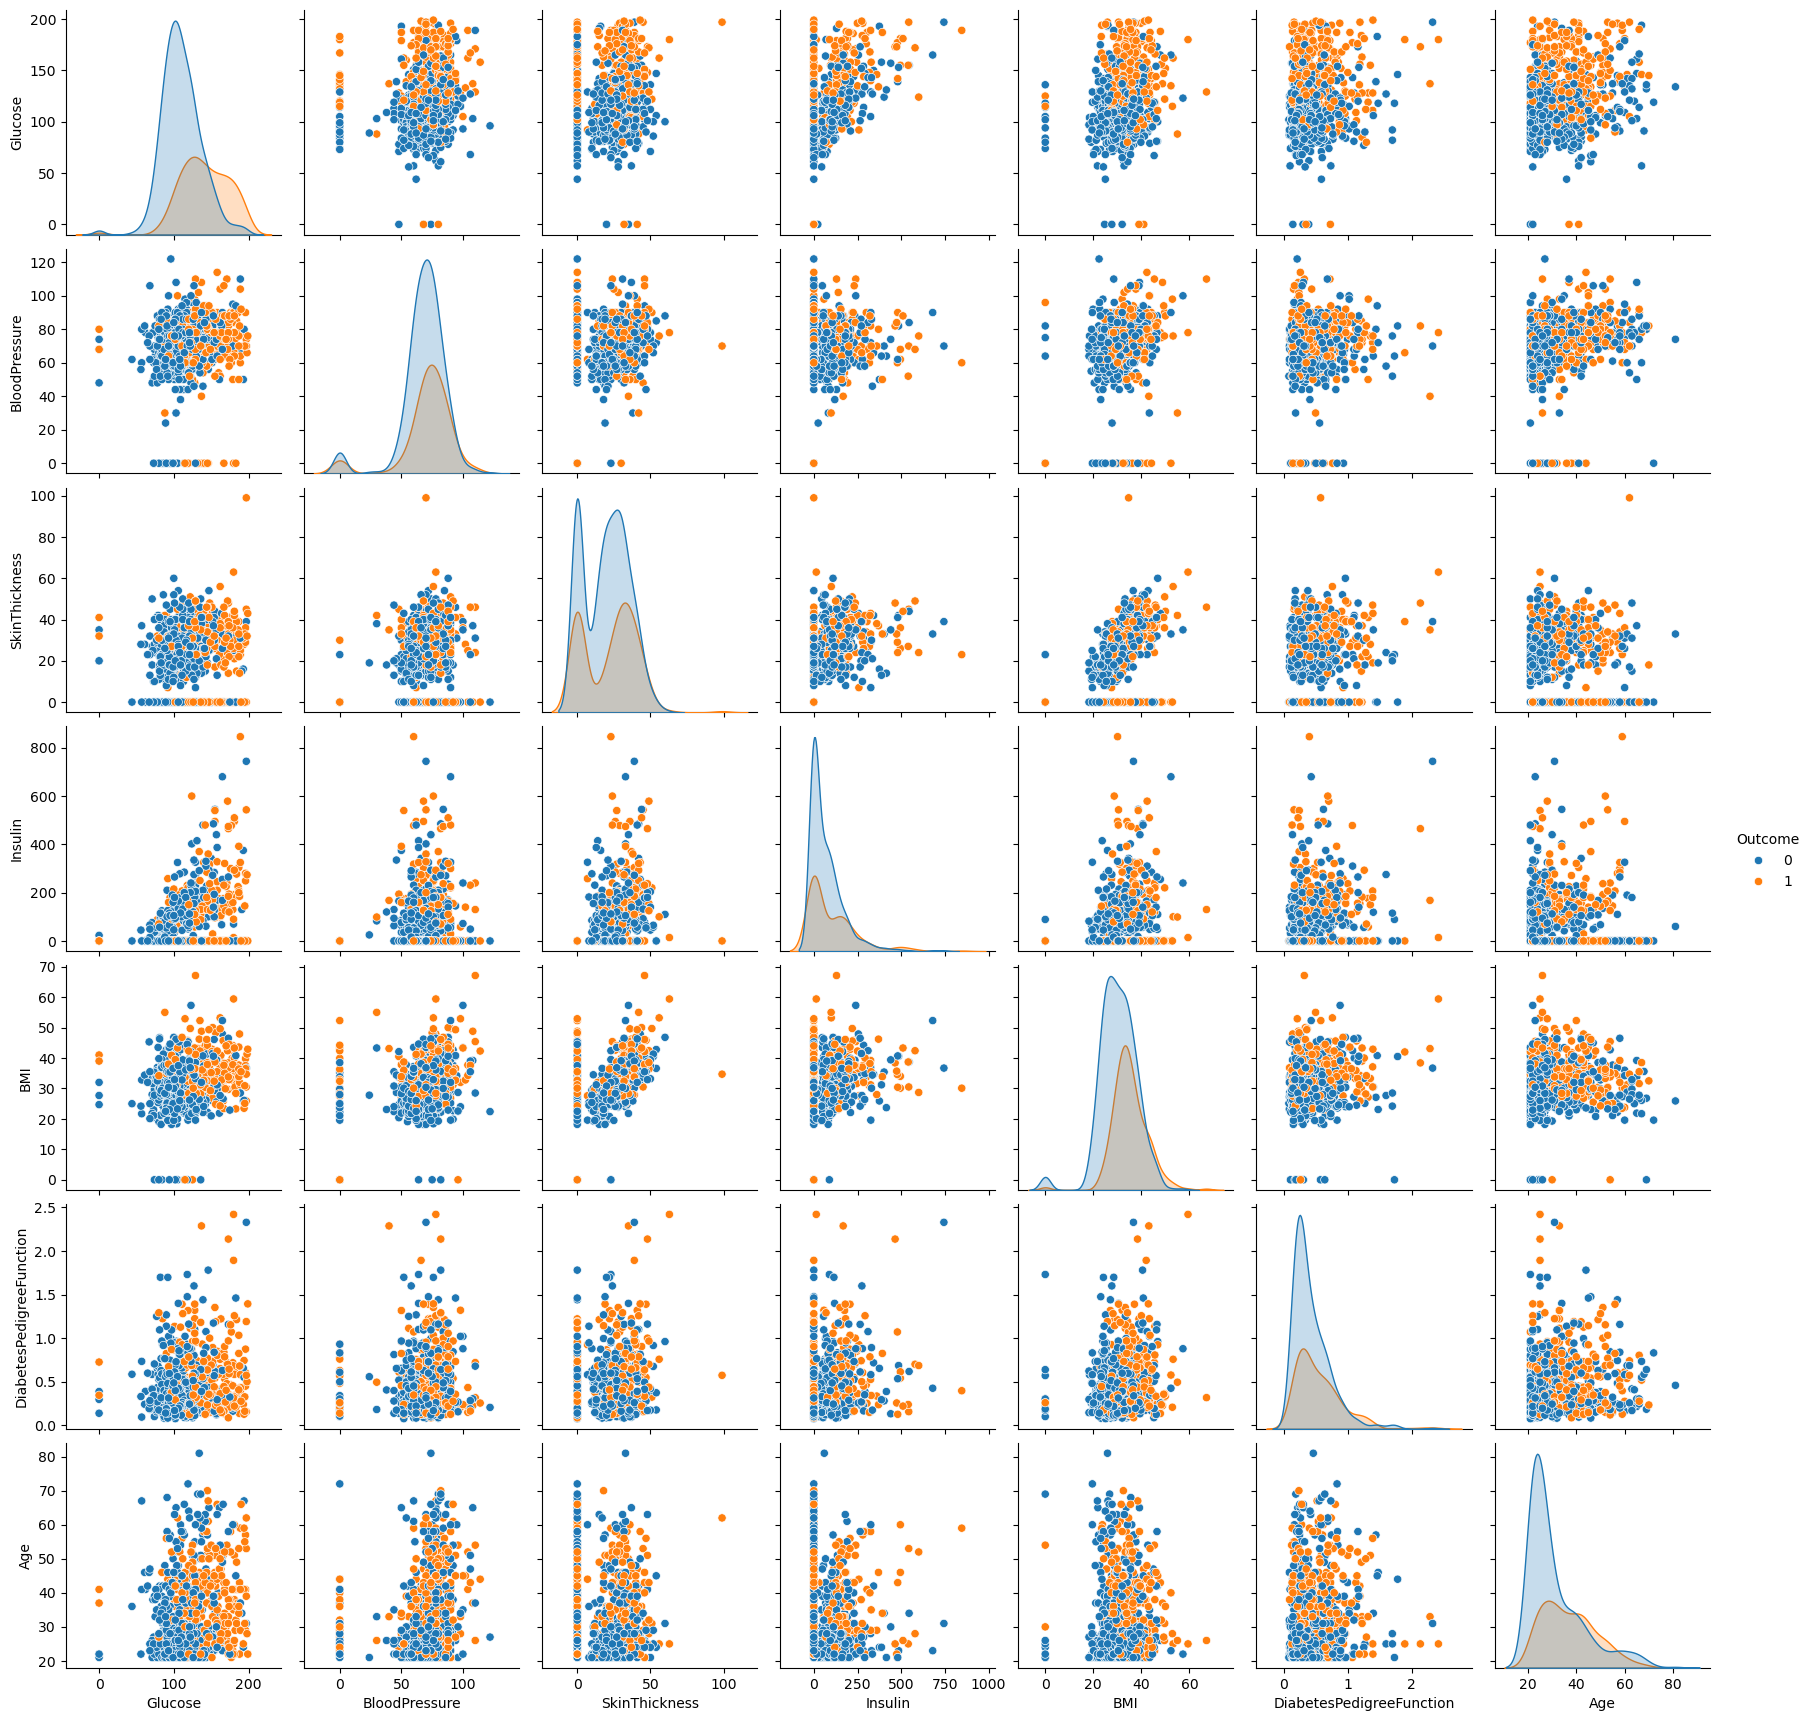

In [10]:
sns.pairplot(df,
             vars=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
            hue ='Outcome')
plt.show()

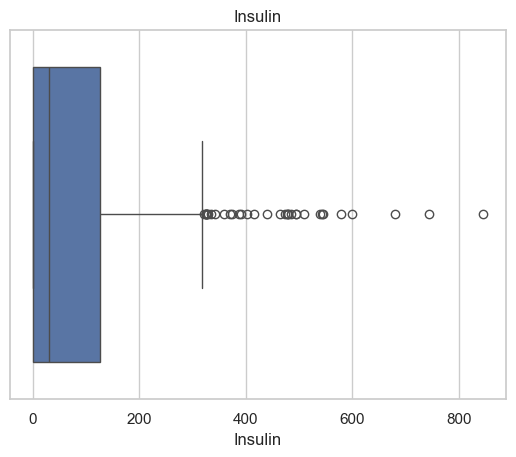

In [11]:
sns.set_theme(style="whitegrid")
sns.boxplot(x="Insulin", data=df)
plt.title("Insulin")
plt.show()

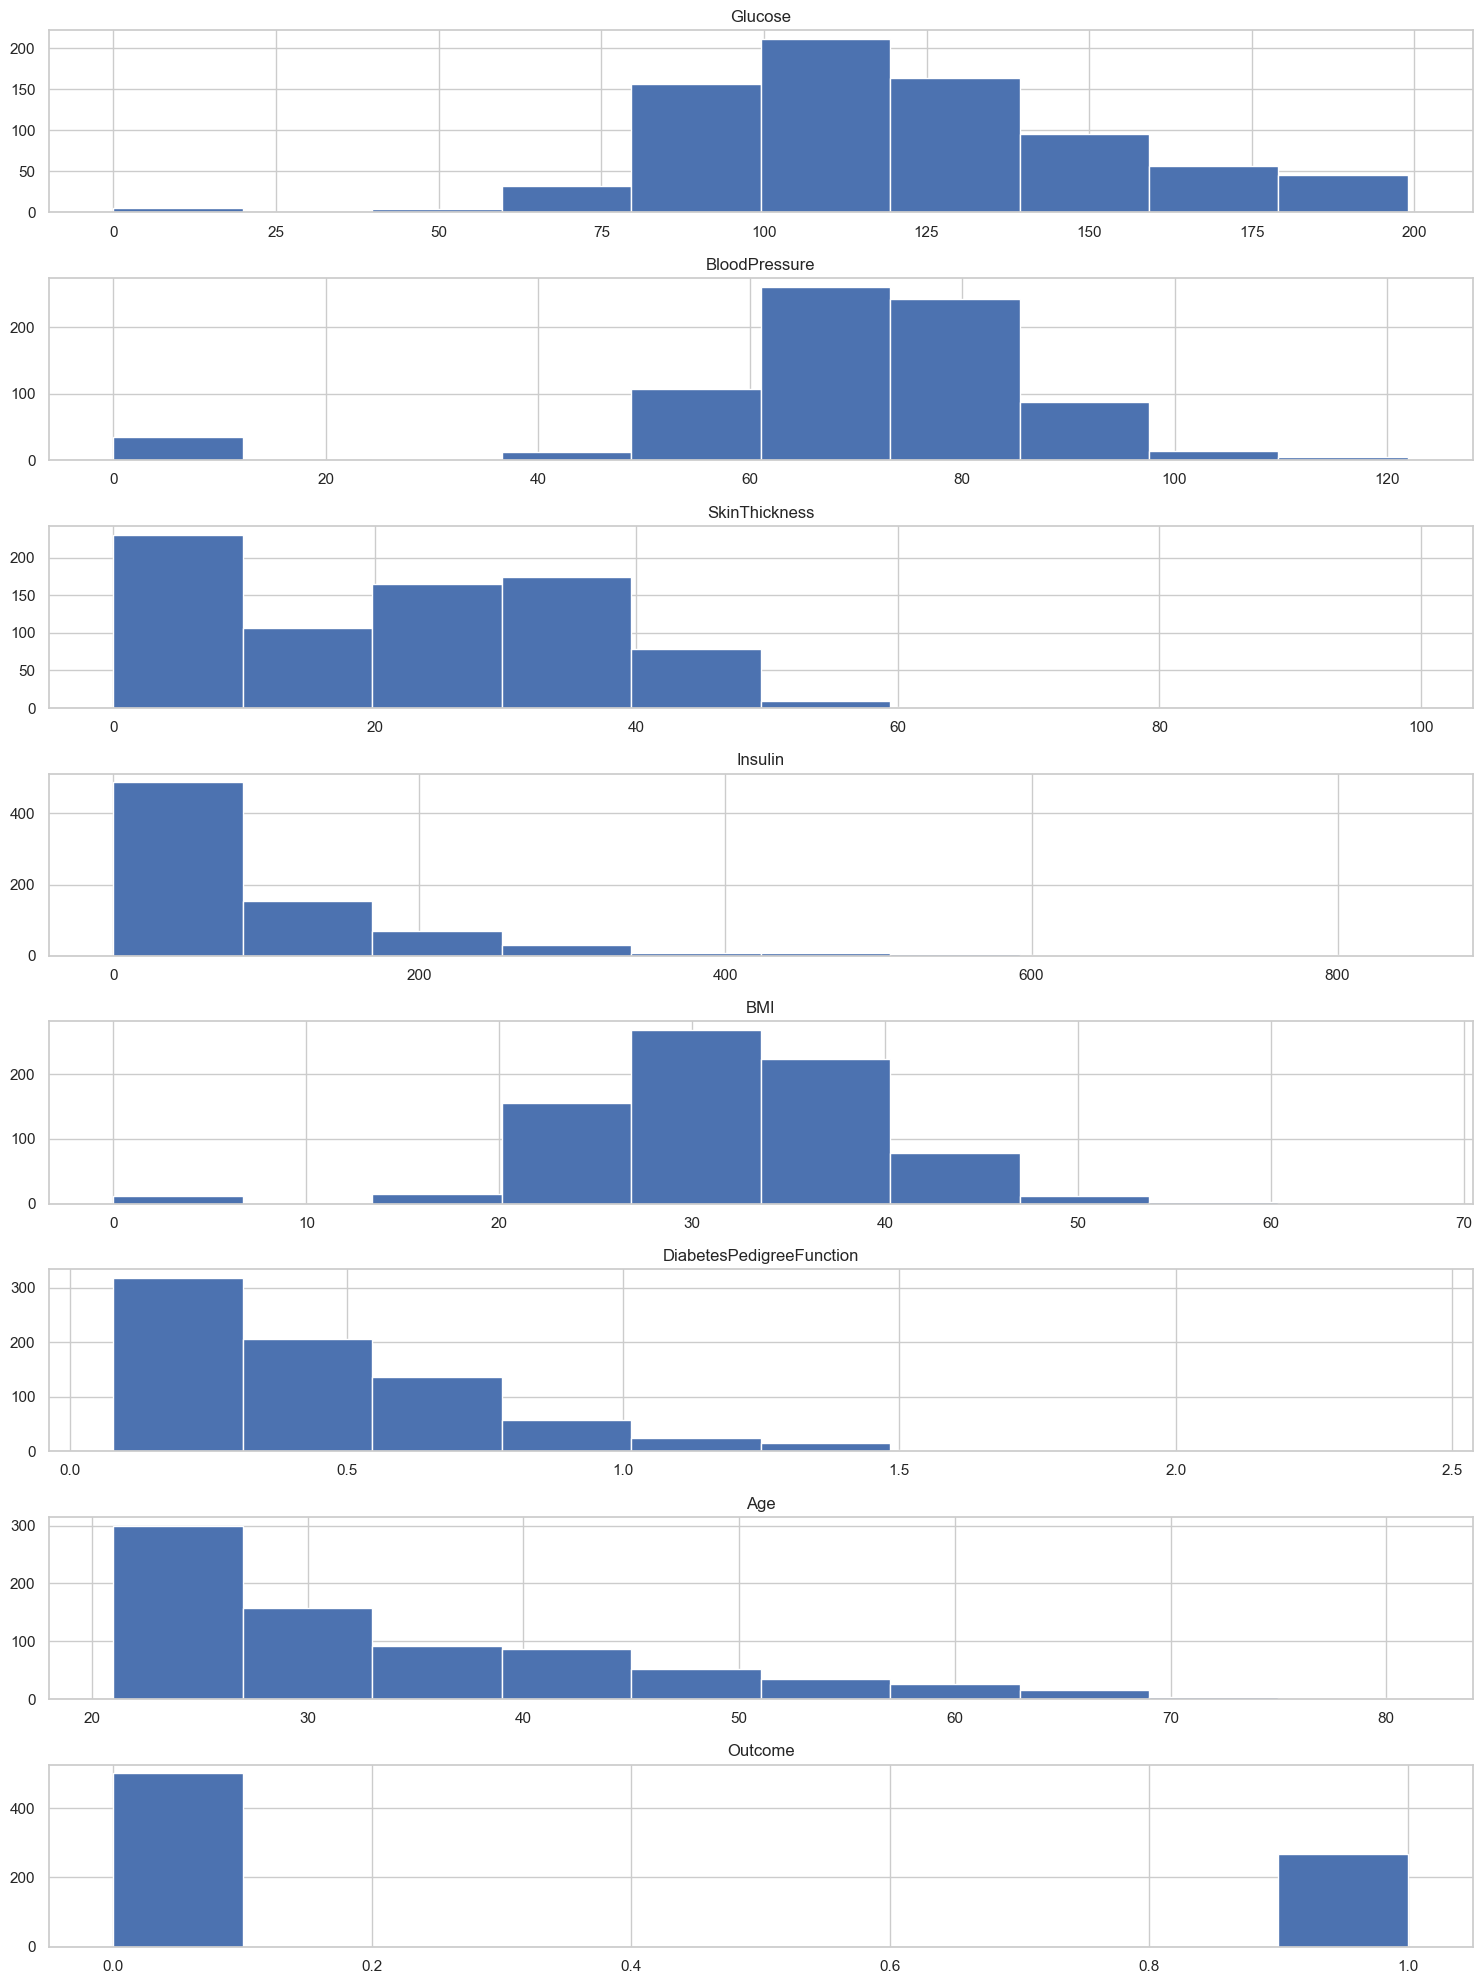

In [12]:
fig, axes = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(15, 20))

for ax, column in zip(axes, df.columns):
    df[column].hist(ax=ax)
    ax.set_title(column)

plt.tight_layout() 
plt.show()

In [24]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

In [31]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [33]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1')

In [34]:
best_rf = grid_search.best_estimator_

In [35]:
y_pred = best_rf.predict(X_test)

In [36]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[74 25]
 [12 89]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        99
           1       0.78      0.88      0.83       101

    accuracy                           0.81       200
   macro avg       0.82      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200

